# SYN 100 - E-Waster Data

In [52]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [53]:
e_waste = pd.read_csv('e_waste_dataset.csv')
e_waste.head(3)

,ID,Item_Name,Brand,Model,Category,Year_of_Purchase,Condition,Quantity,Weight_kg,Recycle_Method,Location,Recycling_Facility,Collection_Date,End_Use,Recycled_Price_USD,Toxic_Components,E-Waste_Collector,Carbon_Footprint,Exported_To
0,8636,Washing Machine,Panasonic,Panasonic Model 472,TV,2018,Broken,2,9.84,Manual,London,Facility B,2024-07-24,E-Waste Disposal,163.41,Lead,Green Electronics,2.90,China
1,2686,Air Conditioner,Xiaomi,Xiaomi Model 921,Appliance,2013,Partially Working,1,10.08,Automated,London,Facility A,2024-05-28,Raw Materials,140.15,Mercury,EcoWaste Solutions,16.21,Germany
2,1491,Headphone,LG,LG Model 829,TV,2014,Partially Working,3,14.27,Both,Shanghai,Facility C,2024-04-20,Parts for Electronics,47.65,Cadmium,EcoWaste Solutions,1.05,China


In [54]:
e_waste.shape

(3000, 19)

In [55]:
e_waste.dtypes

ID                      int64
Item_Name              object
Brand                  object
Model                  object
Category               object
Year_of_Purchase        int64
Condition              object
Quantity                int64
Weight_kg             float64
Recycle_Method         object
Location               object
Recycling_Facility     object
Collection_Date        object
End_Use                object
Recycled_Price_USD    float64
Toxic_Components       object
E-Waste_Collector      object
Carbon_Footprint      float64
Exported_To            object
dtype: object

In [56]:
e_clean = e_waste.drop(columns = ['ID', 
                                         'Brand', 
                                         'Model',  
                                         'Quantity', 
                                         'Weight_kg',
                                         'Location',
                                         'Recycling_Facility',
                                         'Recycled_Price_USD',
                                         'Exported_To',
                                         'Carbon_Footprint',
                                         'Toxic_Components',
                                         'Collection_Date',
                                         'Category'
                                        ])
e_clean.head()

,Item_Name,Year_of_Purchase,Condition,Recycle_Method,End_Use,E-Waste_Collector
0,Washing Machine,2018,Broken,Manual,E-Waste Disposal,Green Electronics
1,Air Conditioner,2013,Partially Working,Automated,Raw Materials,EcoWaste Solutions
2,Headphone,2014,Partially Working,Both,Parts for Electronics,EcoWaste Solutions
3,Headphone,2013,Broken,Manual,Parts for Electronics,Green Electronics
4,Refrigerator,2015,Working,Manual,Parts for Electronics,EcoWaste Solutions


In [57]:
e_clean.isna().any()

Item_Name            False
Year_of_Purchase     False
Condition            False
Recycle_Method       False
End_Use              False
E-Waste_Collector    False
dtype: bool

In [58]:
ew_counts = e_clean['Item_Name'].value_counts().reset_index()
ew_counts

,Item_Name,count
0,Headphone,399
1,Smartphone,383
2,TV,383
3,Washing Machine,381
4,Laptop,368
5,Air Conditioner,367
6,Refrigerator,361
7,Microwave,358


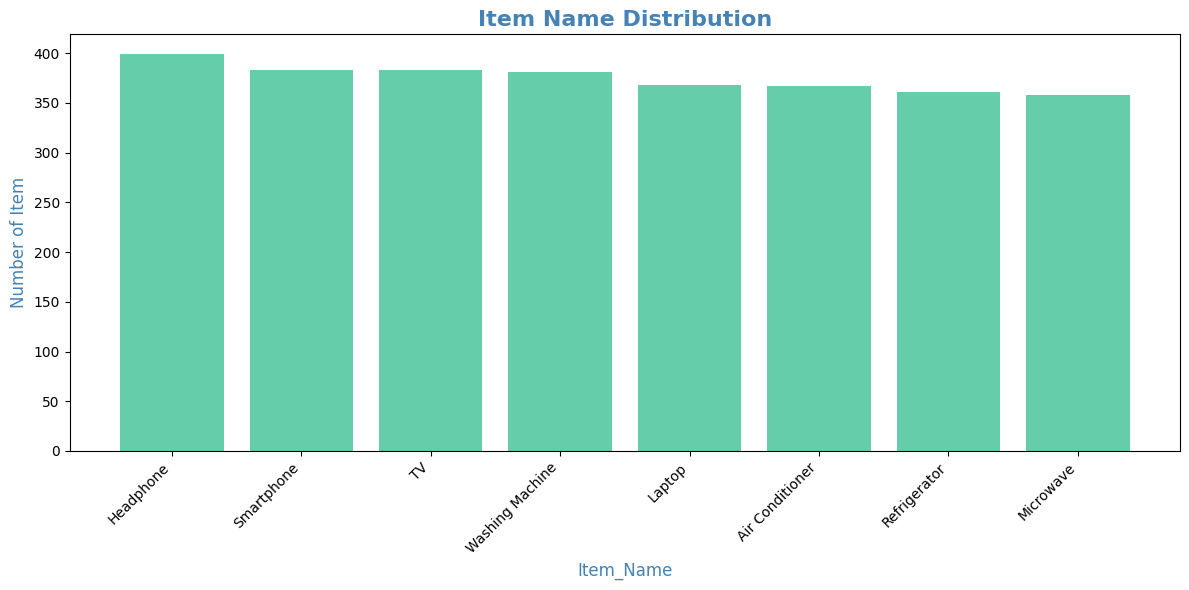

In [59]:
ew_counts.columns = ['Item_Name', 'EW Count']

plt.figure(figsize=(12, 6))
plt.bar(ew_counts['Item_Name'], ew_counts['EW Count'], color = "mediumaquamarine")
plt.title("Item Name Distribution", fontsize=16, fontweight='bold', color = "steelblue")
plt.xlabel("Item_Name", fontsize=12, color = "steelblue")
plt.ylabel("Number of Item", fontsize=12, color = "steelblue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

All products in the data were recycled in 2024. So we can subtract the Year of Purchase from 2024 to get how long the product has been in use.

In [60]:
df = pd.DataFrame(e_waste)
df['Years_Used'] = 2024 - df['Year_of_Purchase']
df['Years_Used'].head()

0     6
1    11
2    10
3    11
4     9
Name: Years_Used, dtype: int64

C:\Users\syunnn\AppData\Local\Temp\ipykernel_63584\3500185636.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Item_Name", y="Years_Used", palette="coolwarm")


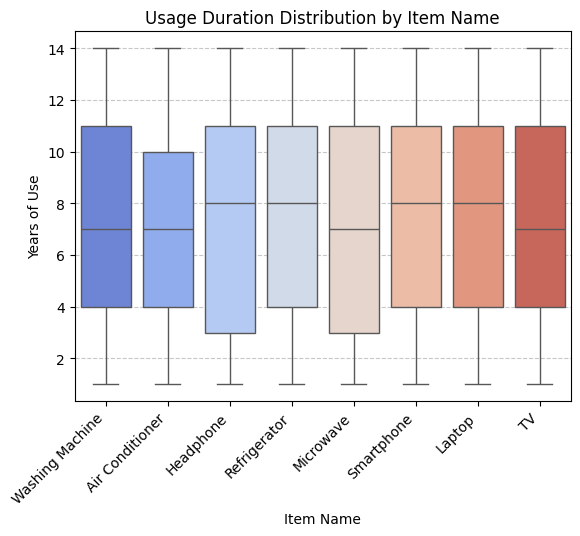

In [61]:
sns.boxplot(data=df, x="Item_Name", y="Years_Used", palette="coolwarm")

plt.xlabel("Item Name")
plt.ylabel("Years of Use")
plt.title("Usage Duration Distribution by Item Name")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


In [62]:
ew_method = e_clean['Recycle_Method'].value_counts().reset_index()
ew_method

,Recycle_Method,count
0,Automated,1023
1,Manual,1021
2,Both,956


In [63]:
ew_condition = e_clean['Condition'].value_counts().reset_index()
ew_condition

,Condition,count
0,Broken,1022
1,Working,1015
2,Partially Working,963


In [64]:
ew_count_by_method = e_clean.groupby(['Recycle_Method','Condition']).size().reset_index(name='Count')
ew_count_by_method

,Recycle_Method,Condition,Count
0,Automated,Broken,375
1,Automated,Partially Working,321
2,Automated,Working,327
3,Both,Broken,303
4,Both,Partially Working,313
5,Both,Working,340
6,Manual,Broken,344
7,Manual,Partially Working,329
8,Manual,Working,348


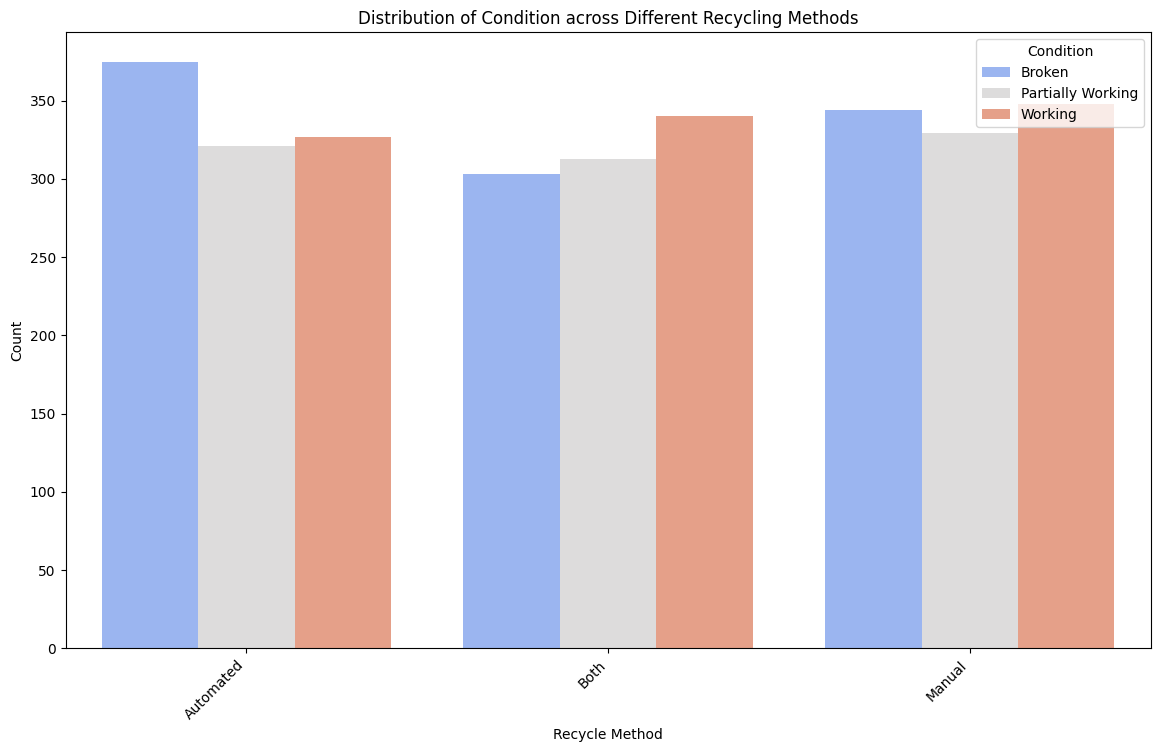

In [65]:
plt.figure(figsize=(14, 8))

sns.barplot(data=ew_count_by_method, x="Recycle_Method", y="Count", hue="Condition", dodge=True, palette="coolwarm")

plt.xlabel("Recycle Method")
plt.ylabel("Count")
plt.title("Distribution of Condition across Different Recycling Methods")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Condition")
plt.show()

In [66]:
ew_use = e_clean['End_Use'].value_counts().reset_index()
ew_use

,End_Use,count
0,Raw Materials,1007
1,Parts for Electronics,1004
2,E-Waste Disposal,989


In [67]:
ew_collector = e_clean['E-Waste_Collector'].value_counts().reset_index()
ew_collector

,E-Waste_Collector,count
0,Green Electronics,1013
1,E-Waste Inc.,1006
2,EcoWaste Solutions,981


In [68]:
ew_count_by_use = e_clean.groupby(['End_Use','E-Waste_Collector']).size().reset_index(name='Count')
ew_count_by_use

,End_Use,E-Waste_Collector,Count
0,E-Waste Disposal,E-Waste Inc.,322
1,E-Waste Disposal,EcoWaste Solutions,324
2,E-Waste Disposal,Green Electronics,343
3,Parts for Electronics,E-Waste Inc.,349
4,Parts for Electronics,EcoWaste Solutions,320
5,Parts for Electronics,Green Electronics,335
6,Raw Materials,E-Waste Inc.,335
7,Raw Materials,EcoWaste Solutions,337
8,Raw Materials,Green Electronics,335


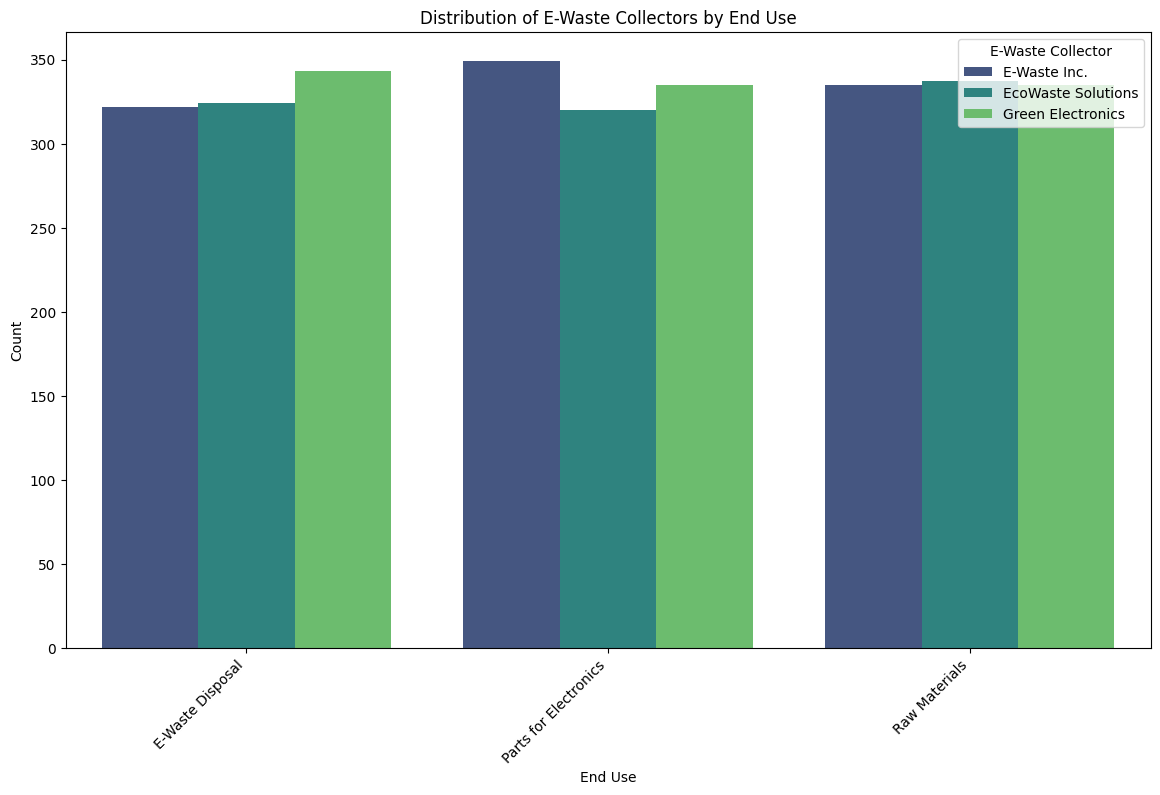

In [69]:
plt.figure(figsize=(14, 8))
sns.barplot(data=ew_count_by_use, x="End_Use", y="Count", hue="E-Waste_Collector", dodge=True, palette="viridis")

plt.xlabel("End Use")
plt.ylabel("Count")
plt.title("Distribution of E-Waste Collectors by End Use")
plt.xticks(rotation=45, ha='right')
plt.legend(title="E-Waste Collector")
plt.show()